In [1]:
import sys
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# WIREPLANE U

In [11]:
wireplane = "V"
sig_name = wireplane+"-signal"
cln_name = wireplane+"-clnsig"
nticks = 200
# NEW DATA SET WITH
path_cc = "../../../Workspace/new_data/train_v1/nu_cc/"
path_es = "../../../Workspace/new_data/train_v1/nu_es/"

In [12]:
def get_data(path1, path2, energy_range):
    filenames1 = [path1+f for f in listdir(path1) if (isfile(join(path1, f)) 
                    and sig_name in f and energy_range in f)]
    clean_filenames1= [path1+f for f in listdir(path1) if (isfile(join(path1, f))
                            and cln_name in f and energy_range in f)]

    filenames2 = [path2+f for f in listdir(path2) if (isfile(join(path2, f)) 
                    and sig_name in f and energy_range in f)]
    clean_filenames2= [path2+f for f in listdir(path2) if (isfile(join(path2, f))
                            and cln_name in f and energy_range in f)]


    combined_data_cc = np.concatenate([np.load(fname) for fname in filenames1])
    combined_clean_data_cc = np.concatenate([np.load(fname) for fname in clean_filenames1])

    combined_data_es = np.concatenate([np.load(fname) for fname in filenames2])
    combined_clean_data_es = np.concatenate([np.load(fname) for fname in clean_filenames2])

    return combined_data_cc, combined_clean_data_cc, combined_data_es, combined_clean_data_es

In [13]:
def get_adcs(path1, path2, energy_range):
    combined_data_cc, combined_clean_data_cc, combined_data_es, combined_clean_data_es = get_data(path_cc, path_es, energy_range)
    adcs_cc = np.array([combined_data_cc['adc0'], combined_data_cc['adc1'],
                    combined_data_cc['adc2'], combined_data_cc['adc3'],
                    combined_data_cc['adc4']]).T

    adcs_es = np.array([combined_data_es['adc0'], combined_data_es['adc1'],
                    combined_data_es['adc2'], combined_data_es['adc3'],
                    combined_data_es['adc4']]).T
    
    max_adcs_cc = []
    for adc in adcs_cc:
        max_adcs_cc.append(max(adc))
    
    max_adcs_es = []
    for adc in adcs_es:
        max_adcs_es.append(max(adc))

    return max_adcs_cc, max_adcs_es    

In [14]:
energies = {
    "en0": "0.005-0.010 GeV (nu_es) AND 0.028-5.50 MeV (nu_cc)",
    "en1": "0.010-0.013 GeV (nu_es) AND 5.50-7.60 MeV (nu_cc)",
    "en2": "0.013-0.016 GeV (nu_es) AND 7.60-10.0 MeV (nu_cc)",
    "en3": "0.016-0.019 GeV (nu_es) AND 10.0-12.0 MeV (nu_cc)",
    "en4": "0.019-0.021 GeV (nu_es) AND 12.0-15.0 MeV (nu_cc)",
    "en5": "0.021-0.024 GeV (nu_es) AND 15.0-17.0 MeV (nu_cc)",
    "en6": "0.024-0.027 GeV (nu_es) AND 17.0-20.0 MeV (nu_cc)",
    "en7": "0.027-0.031 GeV (nu_es) AND 20.0-24.0 MeV (nu_cc)",
    "en8": "0.031-0.036 GeV (nu_es) AND 24.0-29.0 MeV (nu_cc)",
    "en9": "0.036-0.079 GeV (nu_es) AND 29.0-85.0 MeV (nu_cc)"
}

In [15]:
adc_modes = {
    0: "considers ADC > 10",
    1: "considers ADCs between 3 and 10",
    2: "considers ADC = 3",
    3: "considers ADC < 3"

}
def filter_adc(adcs, mode):
    adcs = np.array(adcs)        # mode =
    adc_gt_10 = adcs[adcs > 10]  # mode = 0

    fil1 = adcs[adcs > 3]
    adc_3_10 = fil1[fil1 <= 10]  # mode = 1

    adc_3 = adcs[adcs == 3]      # mode = 2
    adc_lt_3 = adcs[adcs < 3]      # mode = 3

    res = [adc_gt_10, adc_3_10, adc_3, adc_lt_3]
    return res[mode]
    

# TEST

In [16]:
for i in range(10):
    max_adcs_cc, max_adcs_es = get_adcs(path_cc, path_es, "en"+str(i))
    max_adcs_cc = np.array(max_adcs_cc)
    max_adcs_es = np.array(max_adcs_es)
    print(len(max_adcs_cc[max_adcs_cc < 0]), len(max_adcs_es[max_adcs_es < 0]))

0 0
0 0
1 0
1 2
0 3
1 2
2 2
0 0
4 6
16 6


# TEST

In [17]:
def make_hist_adc(path1, path2, energy_range, adc_mode):
    max_adcs_cc, max_adcs_es = get_adcs(path1, path2, energy_range)
    total_cc = len(max_adcs_cc)
    total_es = len(max_adcs_es)
    max_adcs_cc = filter_adc(max_adcs_cc, adc_mode)
    max_adcs_es = filter_adc(max_adcs_es, adc_mode)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))
    fig.suptitle('ADC distribution for energy ' + energy_range + ': ' + energies[energy_range], fontsize=20)

    ax1.hist(max_adcs_cc, color='blue', label= adc_modes[adc_mode] + " (total count: " + str(len(max_adcs_cc)) +")")
    
    ax1.set_title("nu_cc (full data has " + str(total_cc) + " entries)", fontsize=15)
    ax1.set_xlabel("ADC", fontsize=12)
    ax1.set_ylabel("count", fontsize=12)
    ax1.legend(fontsize=12)
    
    ax2.hist(max_adcs_es, color='blue', label= adc_modes[adc_mode] + " (total count: " + str(len(max_adcs_es)) +")")
    ax2.set_title("nu_es (full data has " + str(total_es) + " entries)", fontsize=15)
    ax2.set_ylabel("count", fontsize=12)
    ax2.set_xlabel("ADC", fontsize=12)
    #ax2.set_xlim(xlim_es)
    #ax2.set_ylim(ylim_es)
    ax2.legend(fontsize=12)
    plt.show()

In [18]:
def get_percentage(adcs):
    adcs = np.array(adcs) 
    
    #adc_lt_3 = adcs[adcs <= 3]
    #lt_3_per = int(len(adc_lt_3)/len(adcs)*100)  
    
    fil1 = adcs[adcs > 3]
    adc_3_10 = fil1[fil1 <= 10]
    per_3_10 = int(len(adc_3_10)/len(adcs)*100)
    
    adc_gt_10 = adcs[adcs > 10]
    gt_10_per = int(len(adc_gt_10)/len(adcs)*100)

    adc_3 = adcs[adcs == 3]
    adc_3_per = int(len(adc_3)/len(adcs)*100)

    adc_lt_3_ = adcs[adcs < 3]
    adc_lt_3_per_ = int(len(adc_lt_3_)/len(adcs)*100)
    res = [gt_10_per, per_3_10, adc_3_per, adc_lt_3_per_]
    return res

def make_per_hists(energy_range):
    max_adcs_cc, max_adcs_es = get_adcs(path_cc, path_es, energy_range)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))
    fig.suptitle('Percentage of entries by ADC range for ' + energy_range + ': ' + energies[energy_range], fontsize=20)
    # ranges = ["ADC <= 3", "3 < ADC <= 10", "ADC < 10", "ADC == 3", "ADC < 3"]
    ranges = ["ADC > 10", "3 < ADC <= 10", "ADC == 3", "ADC < 3"]
    ax2.bar(ranges, get_percentage(max_adcs_cc), color='blue')
    ax2.set_title("nu_cc", fontsize=15)

    ax1.bar(ranges, get_percentage(max_adcs_es), color='blue')
    ax1.set_title("nu_es", fontsize=15)
    plt.show()

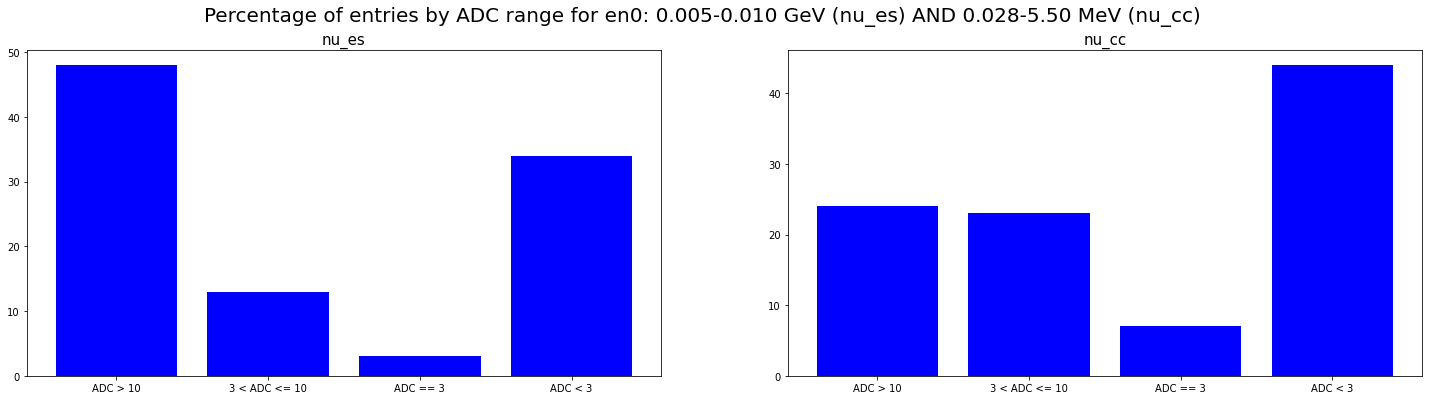

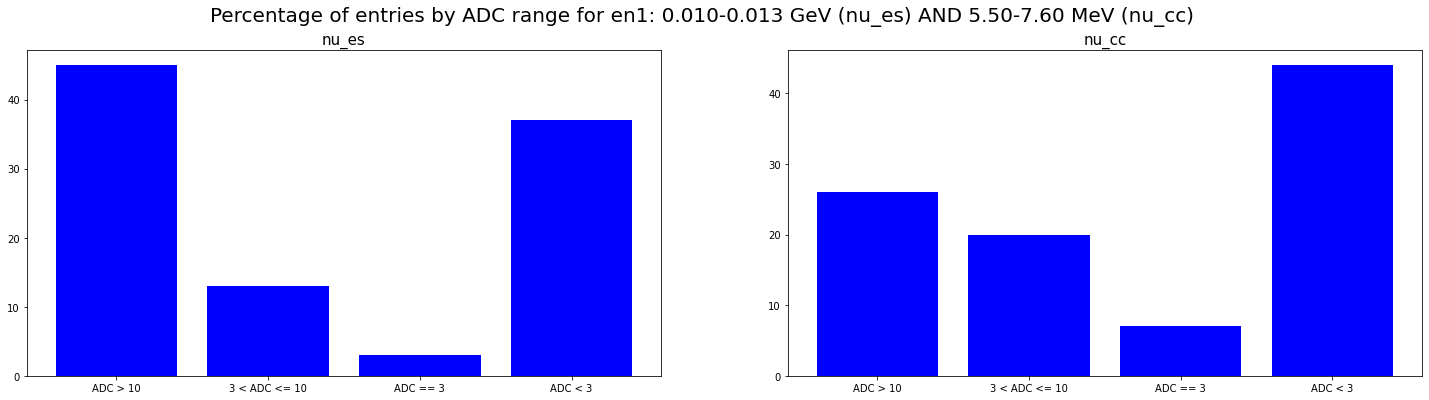

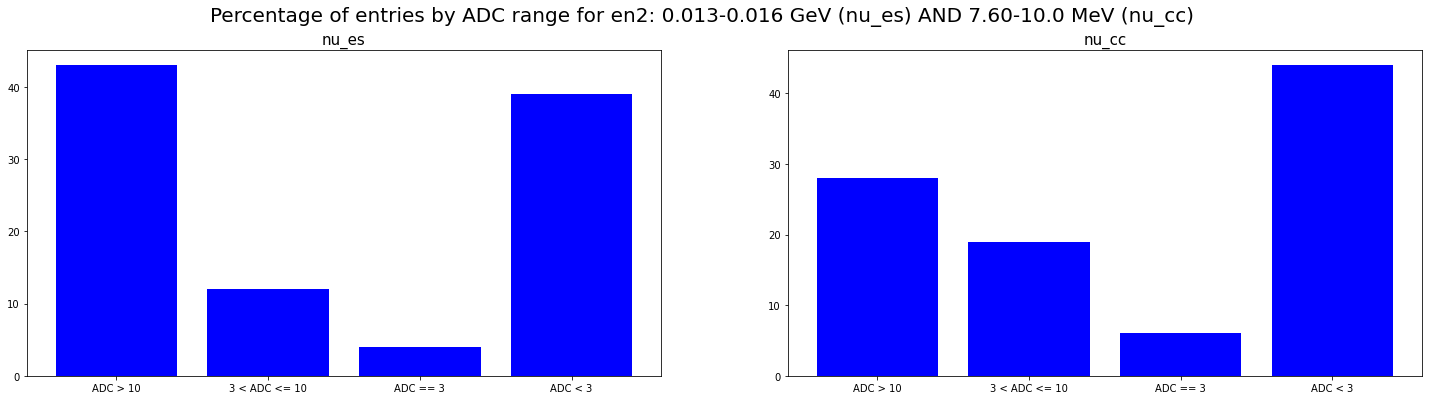

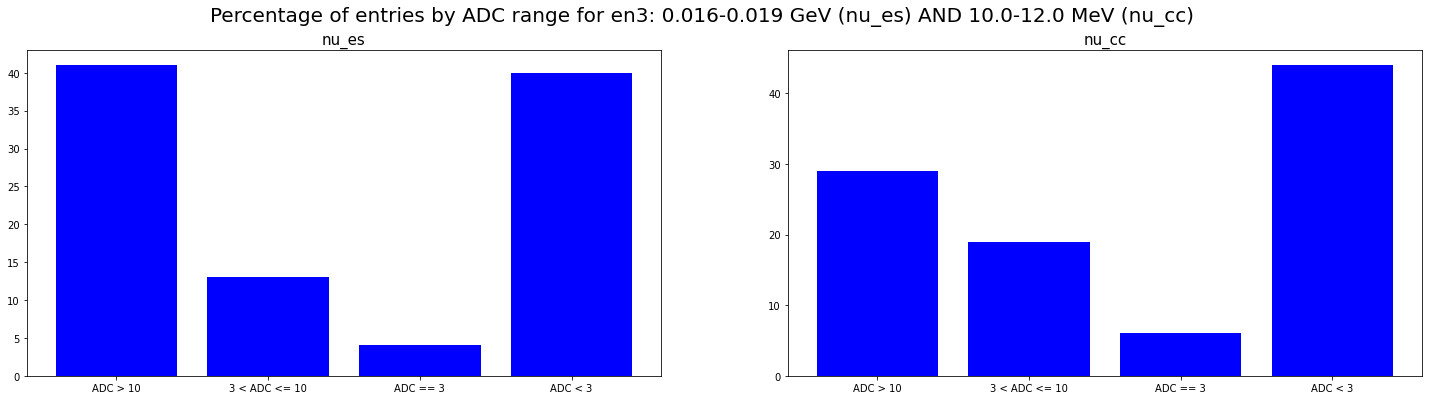

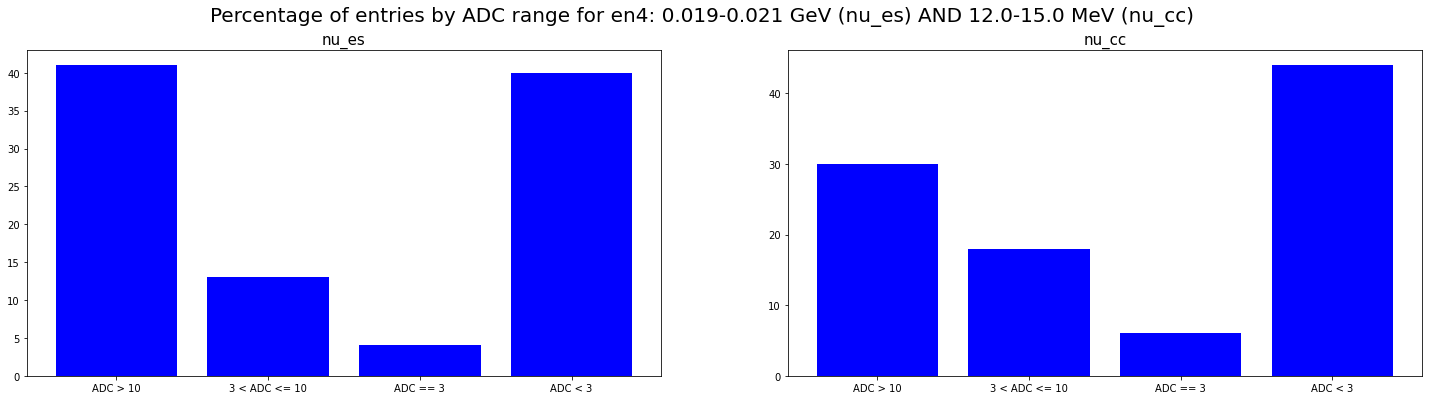

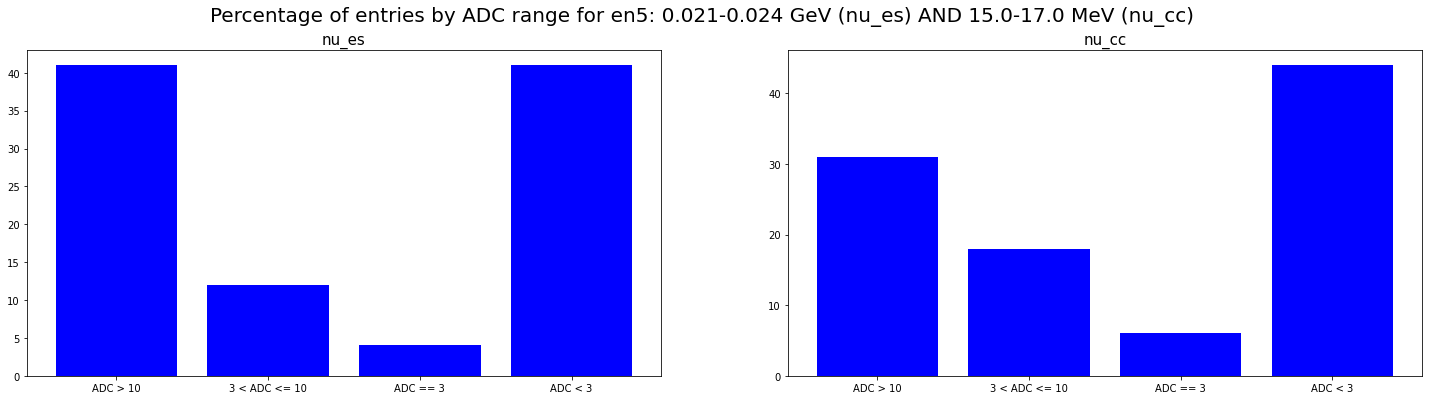

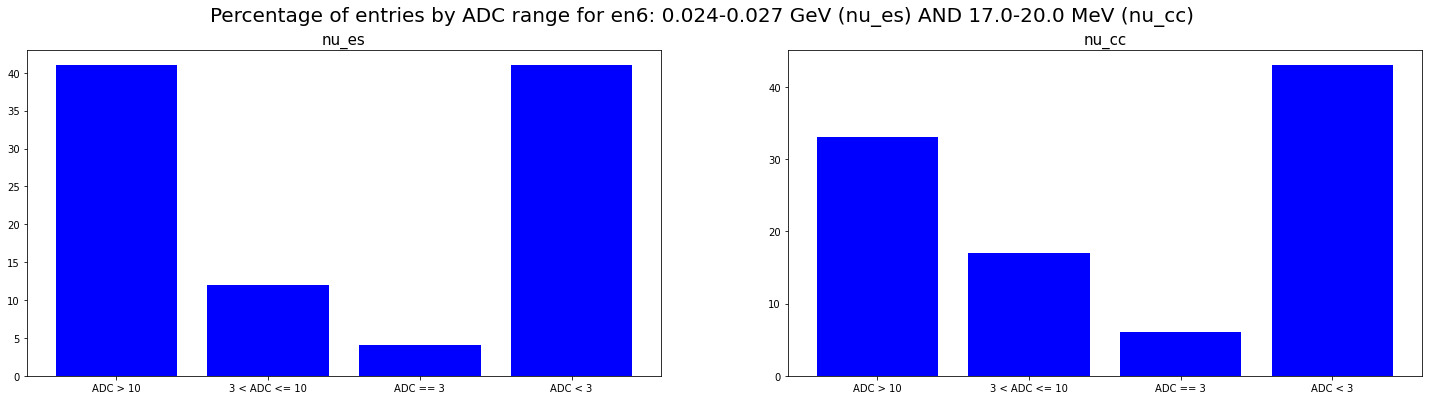

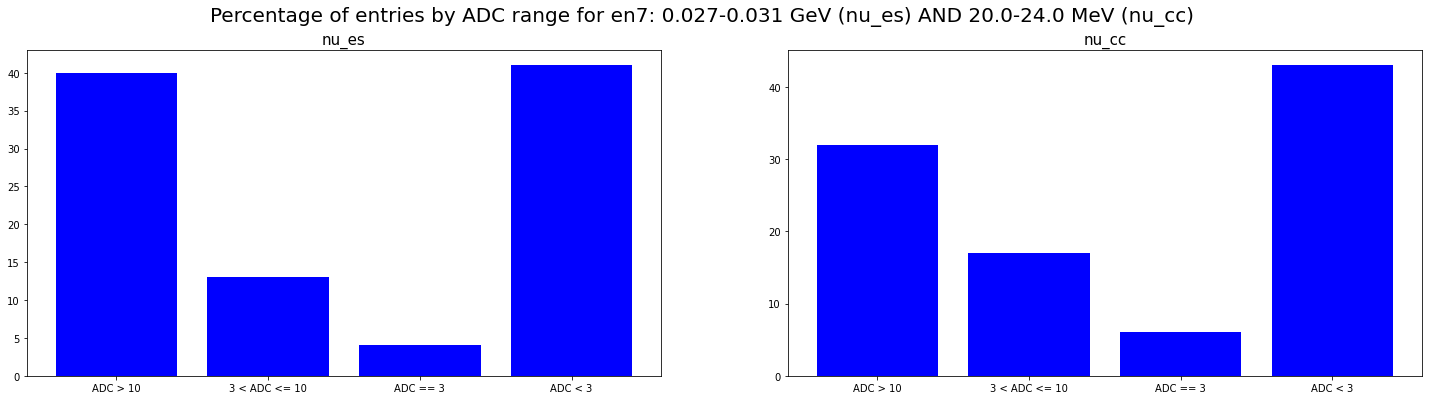

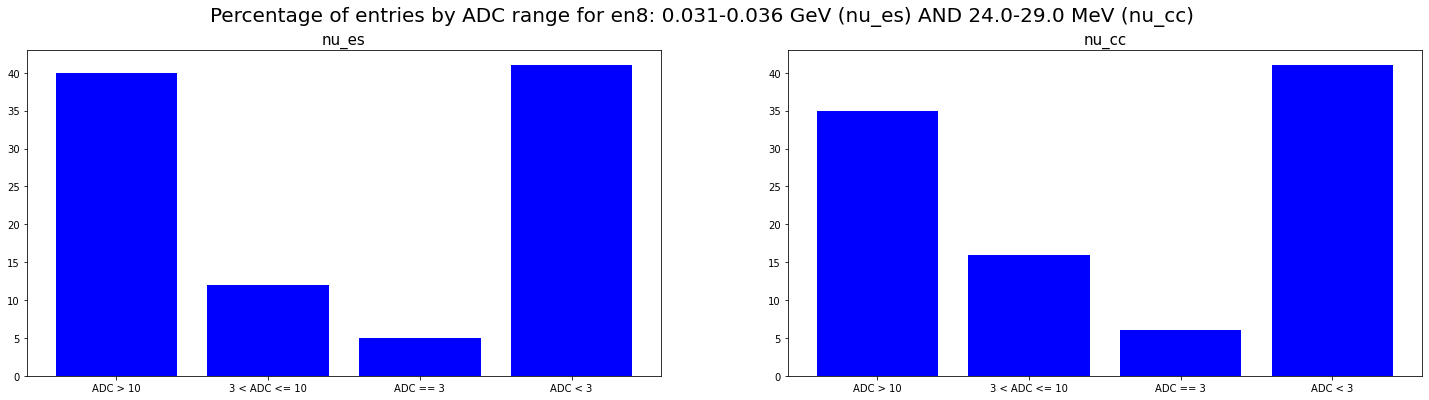

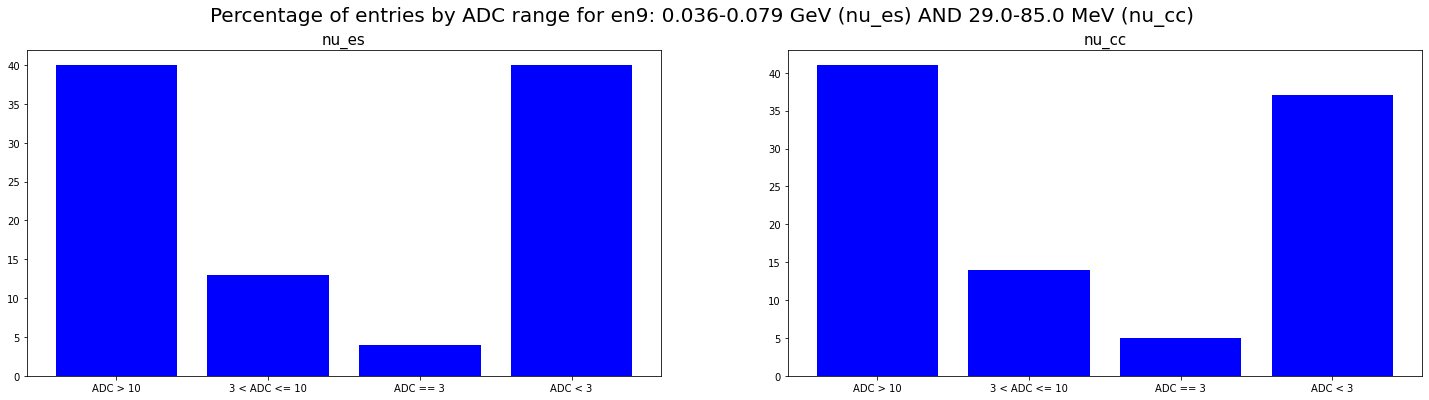

In [19]:
for i in range(10):
    make_per_hists("en"+str(i))

# en0: 0.005-0.010 GeV

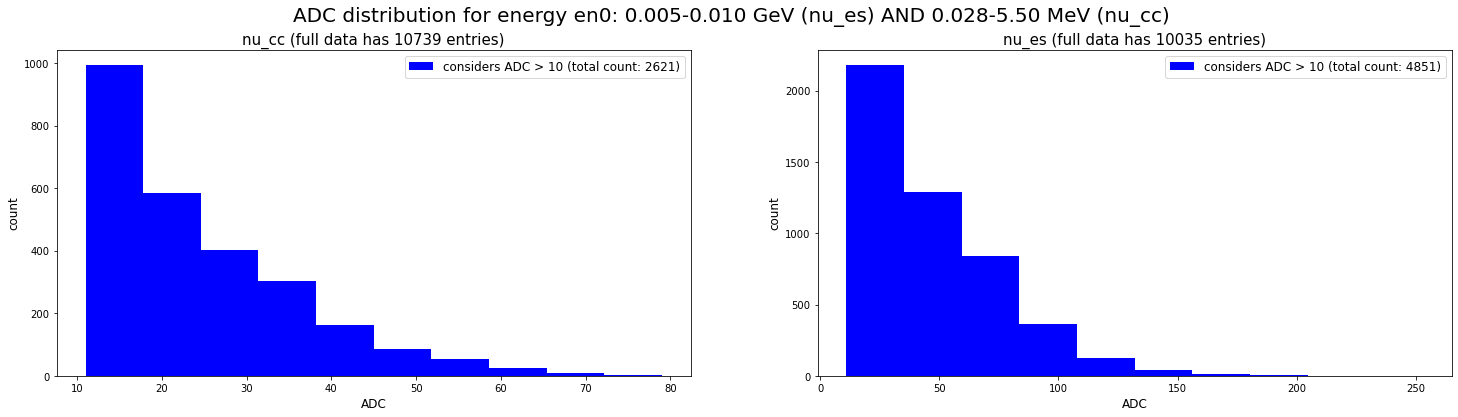

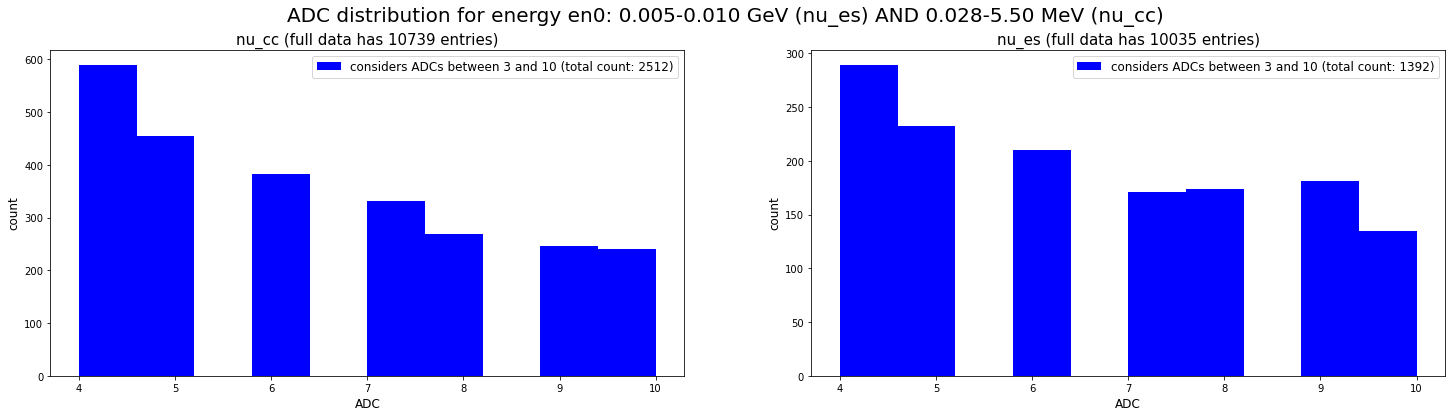

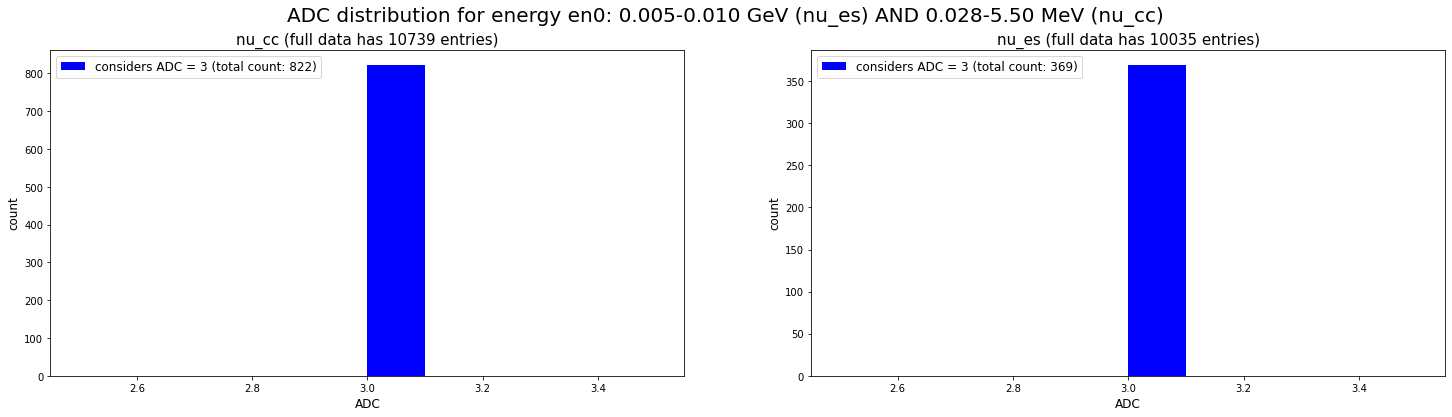

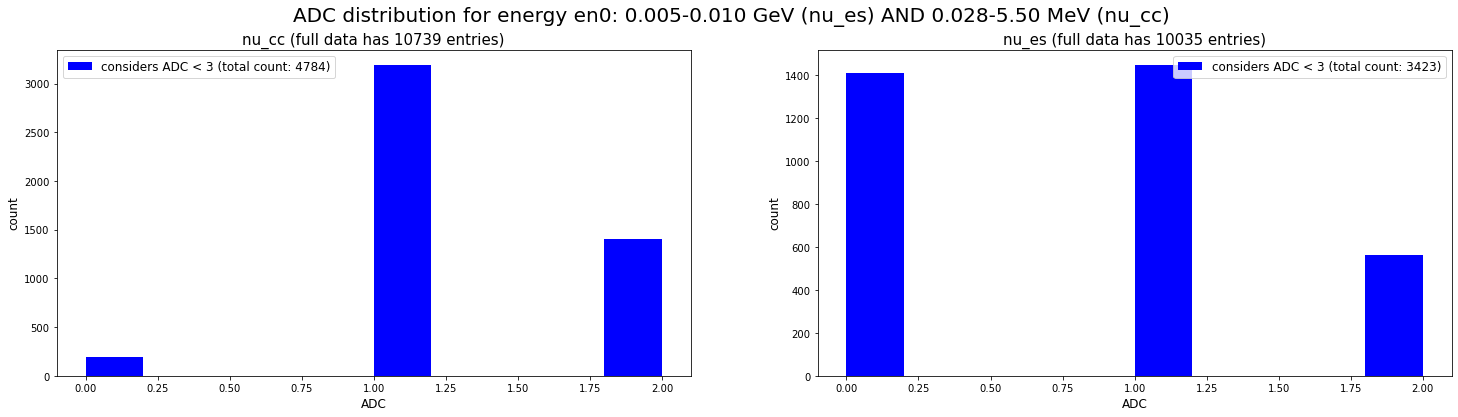

In [20]:
for i in range(0, 4):
    make_hist_adc(path_cc, path_es, "en0",i)

# en1: 0.010-0.013 GeV

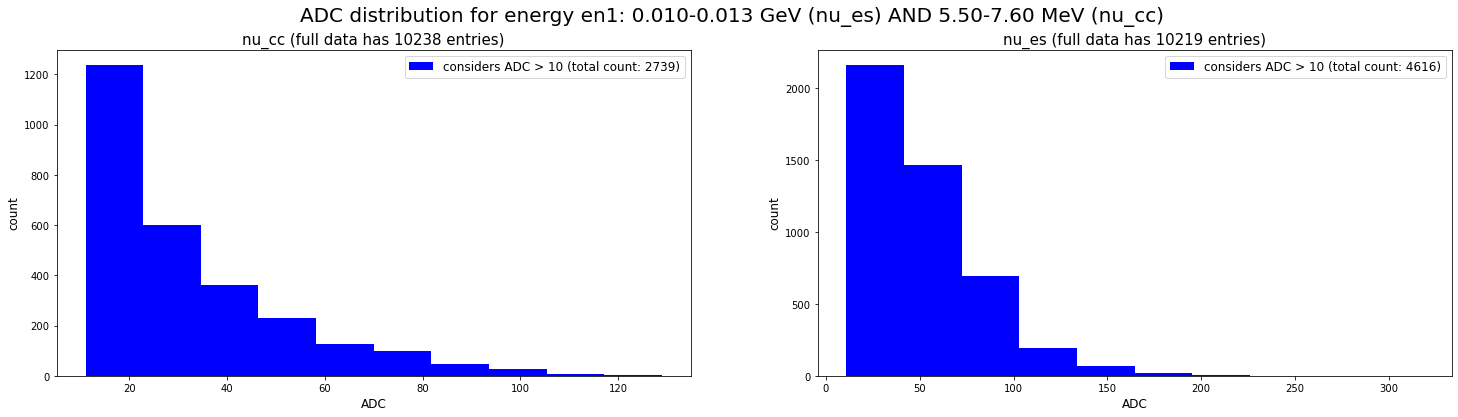

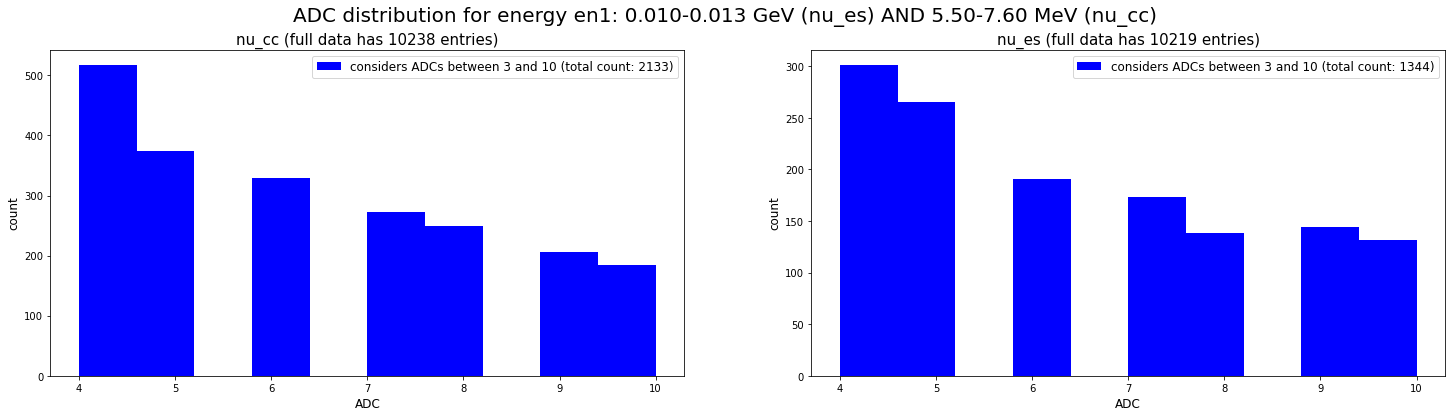

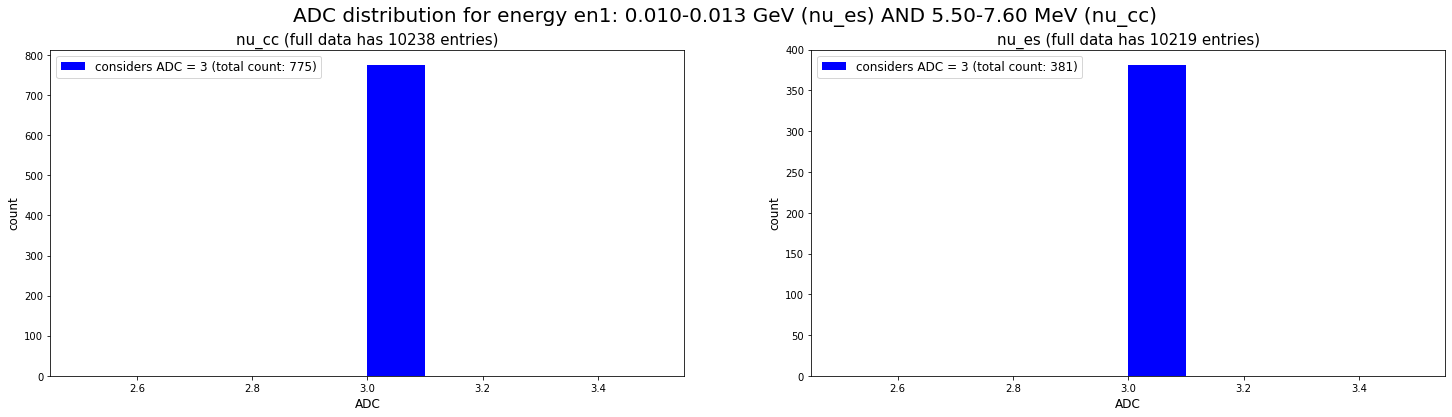

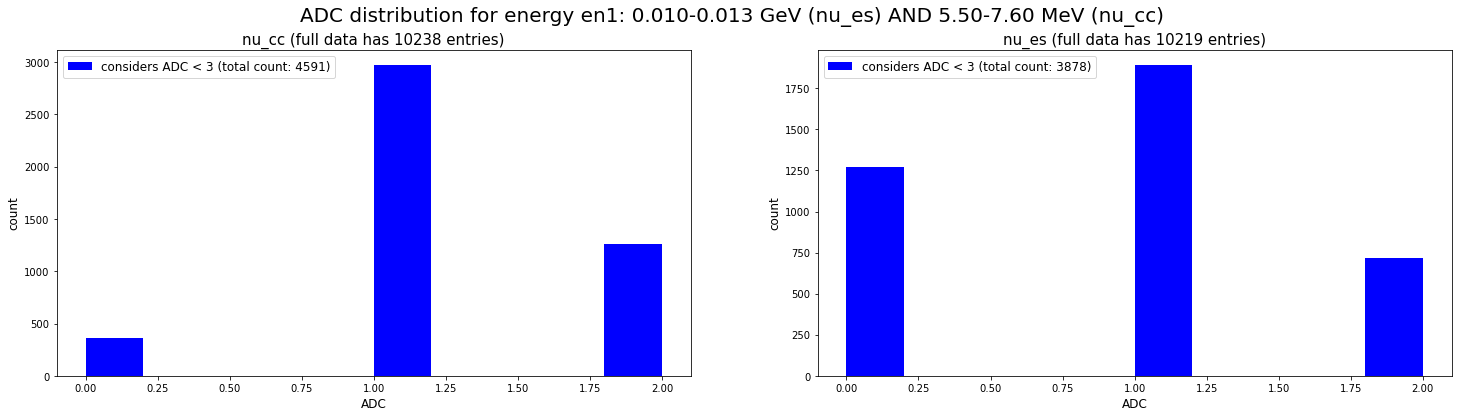

In [21]:
for i in range(0, 4):
    make_hist_adc(path_cc, path_es, "en1",i)

# en2: 0.013-0.016 GeV

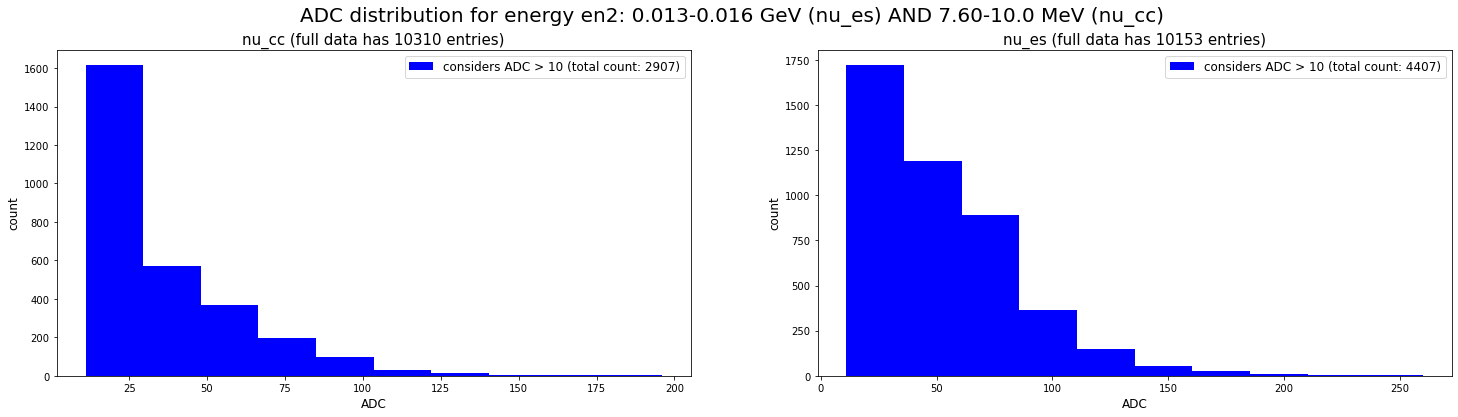

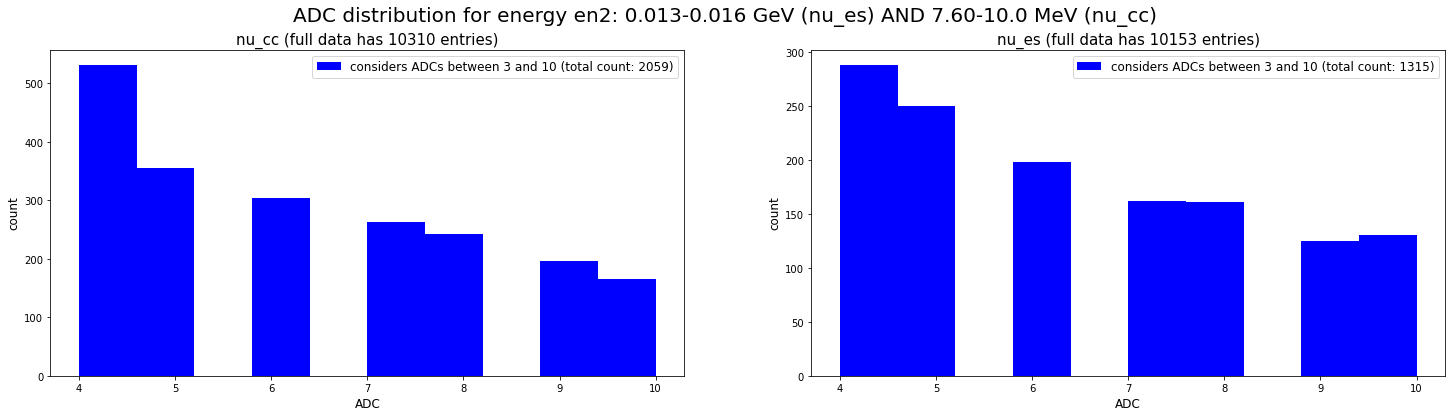

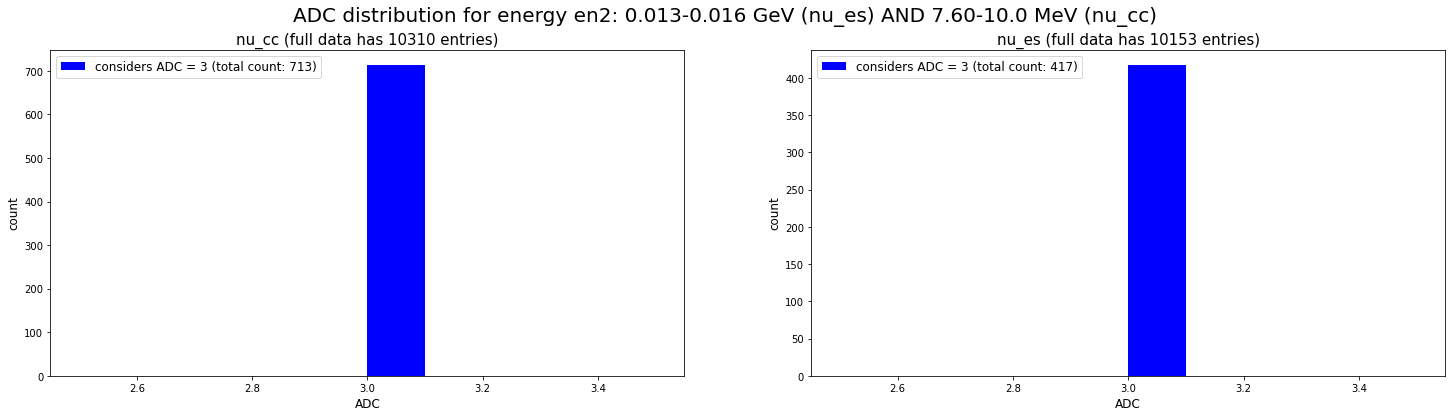

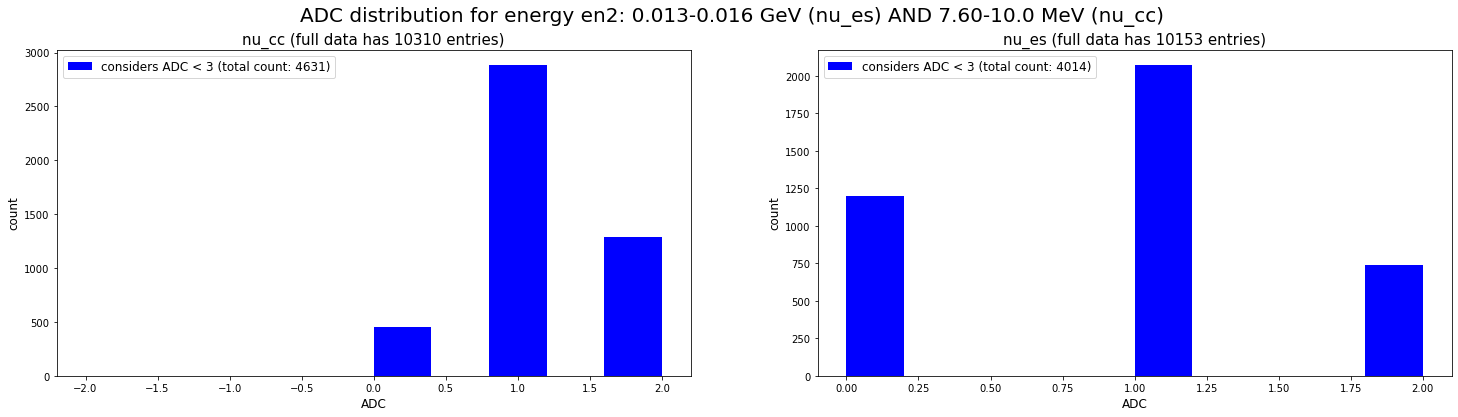

In [22]:
for i in range(0, 4):
    make_hist_adc(path_cc, path_es, "en2",i)

# en3: 0.016-0.019 GeV

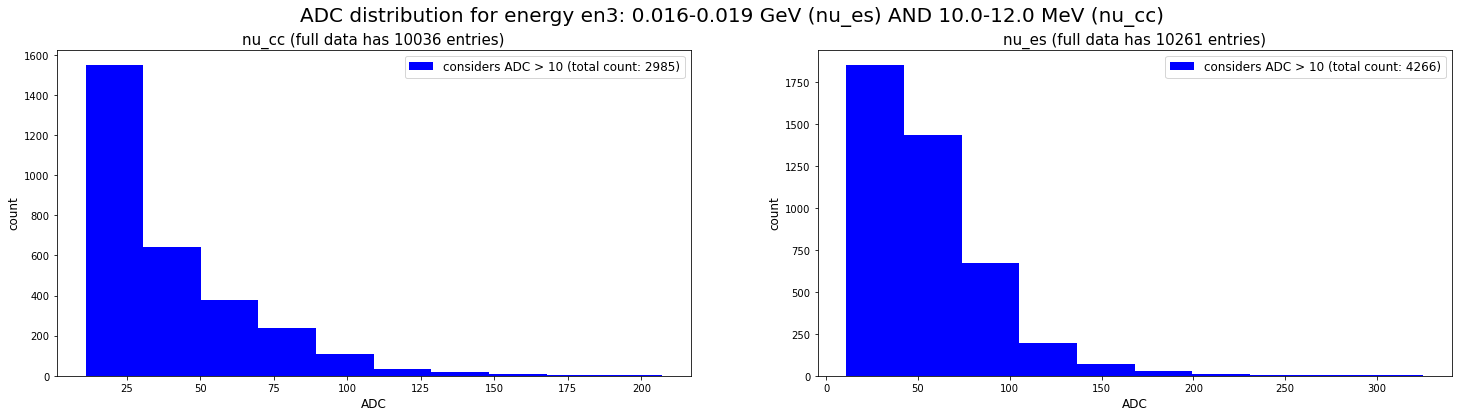

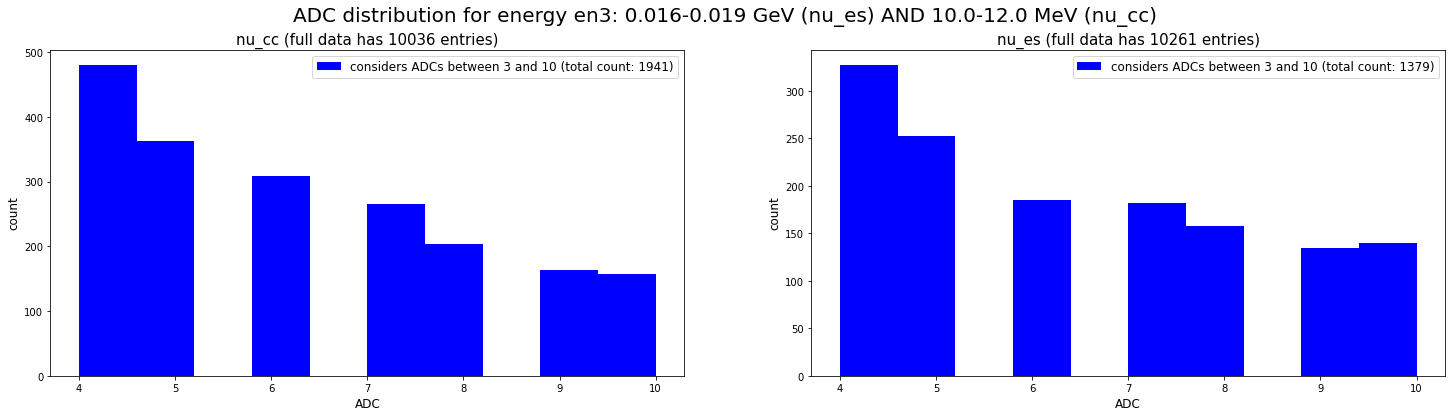

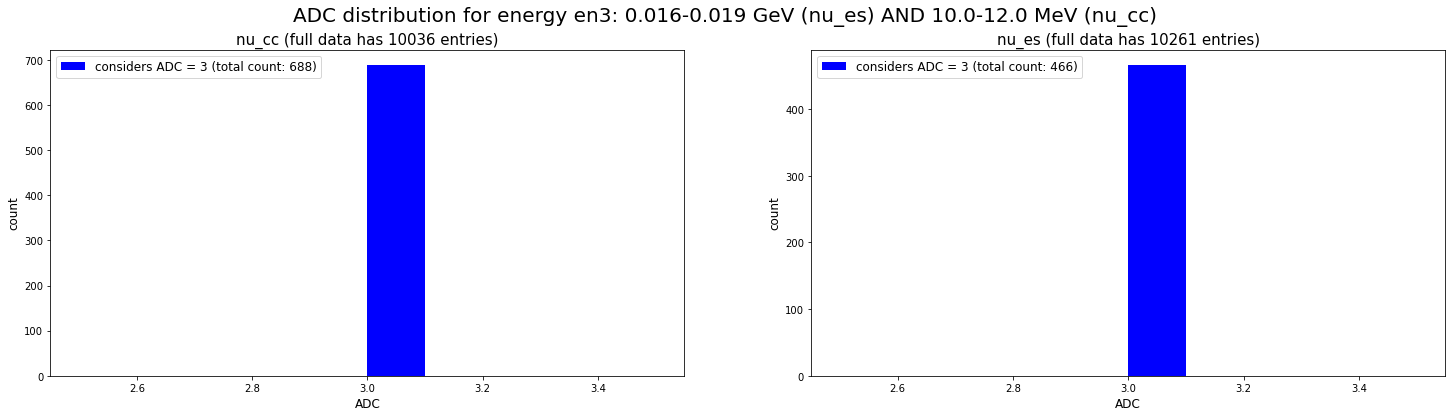

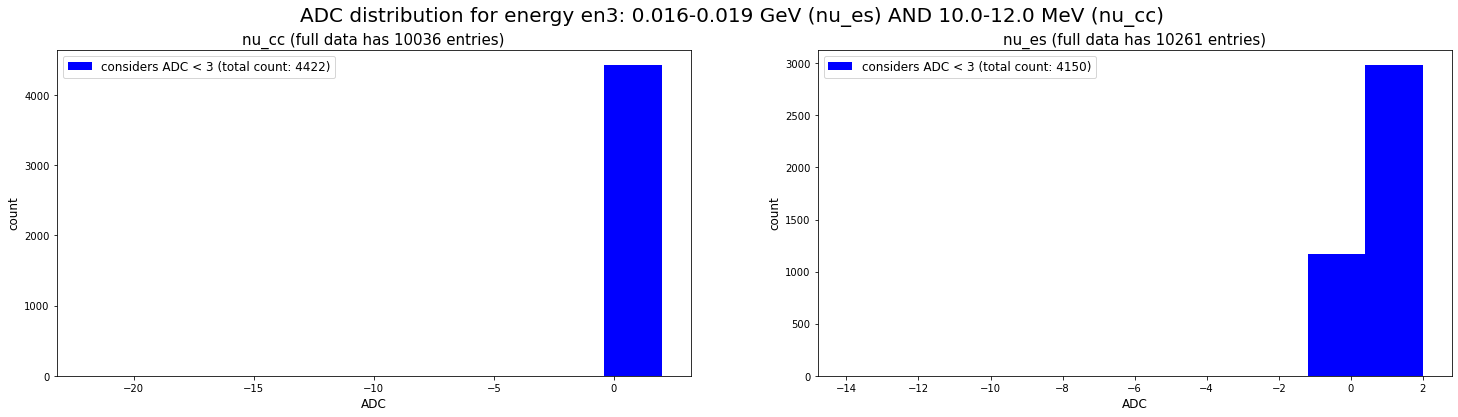

In [23]:
for i in range(0, 4):
    make_hist_adc(path_cc, path_es, "en3",i)

# en4: 0.019-0.021 GeV

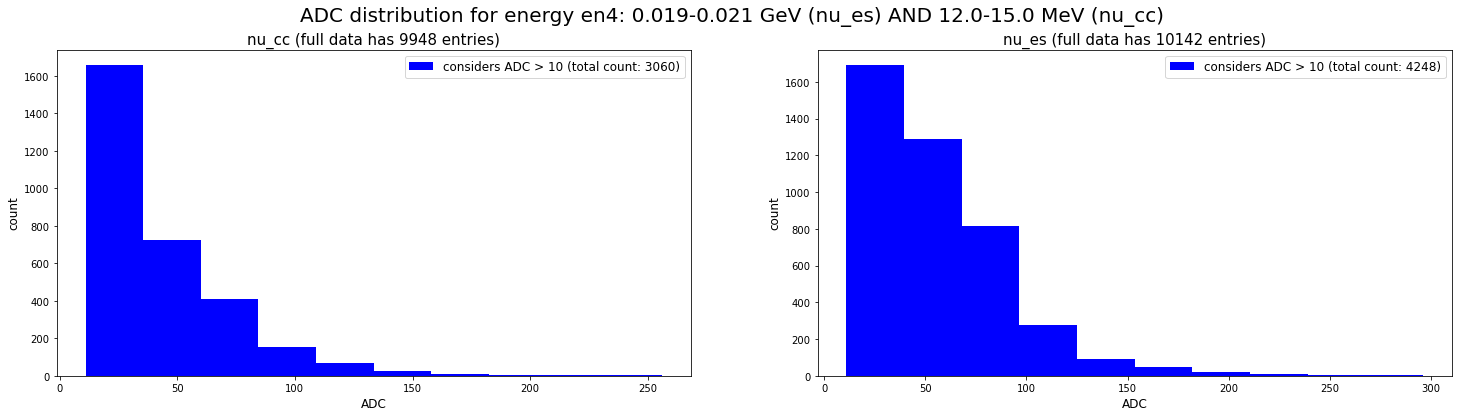

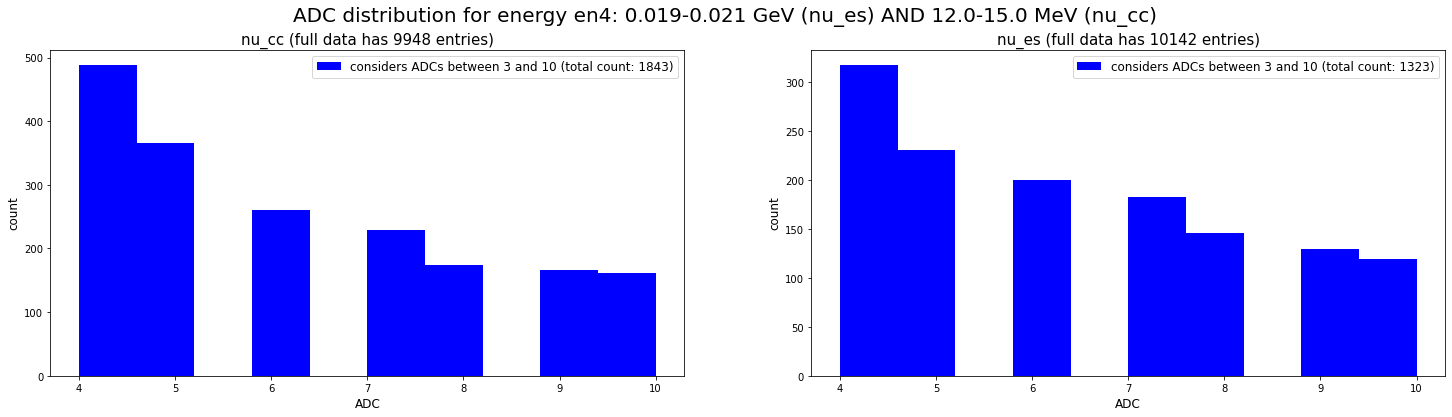

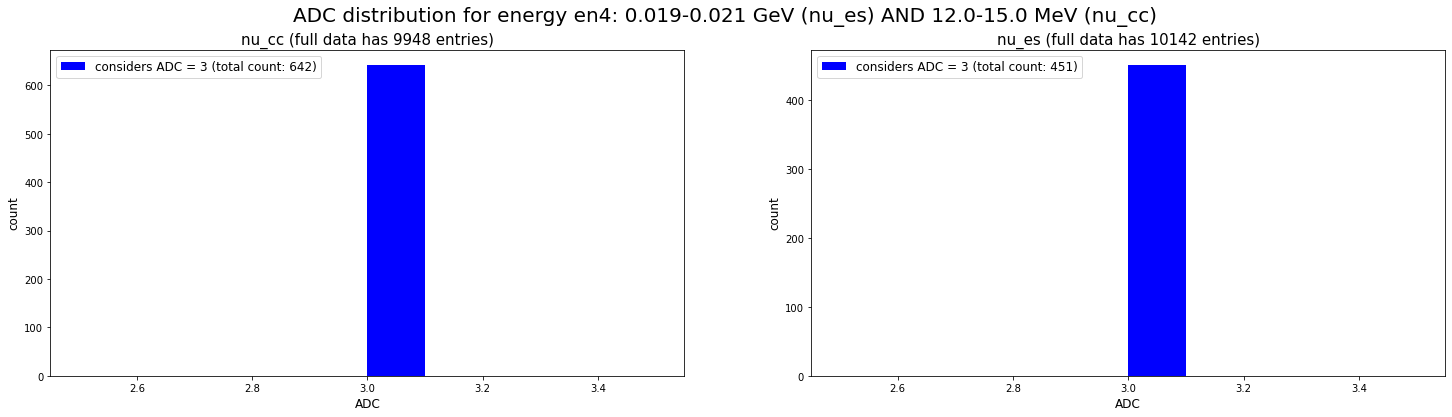

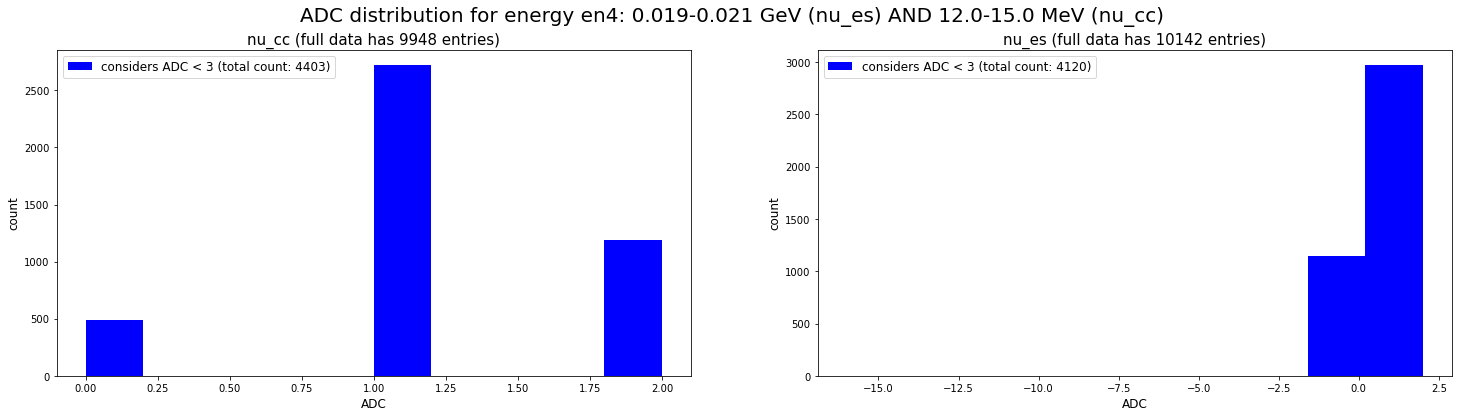

In [24]:
for i in range(0, 4):
    make_hist_adc(path_cc, path_es, "en4",i)

# en5: 0.021-0.024 GeV

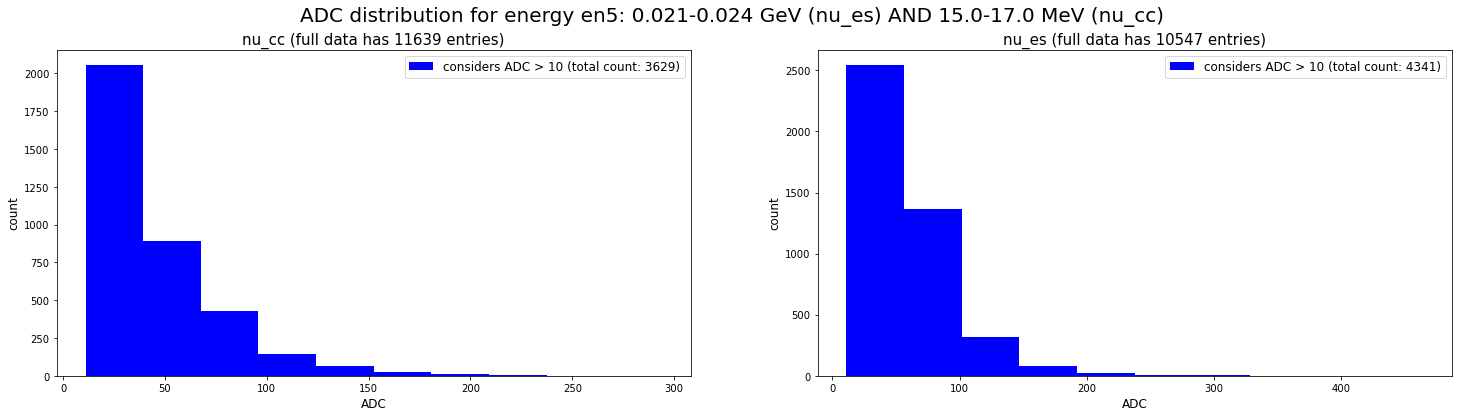

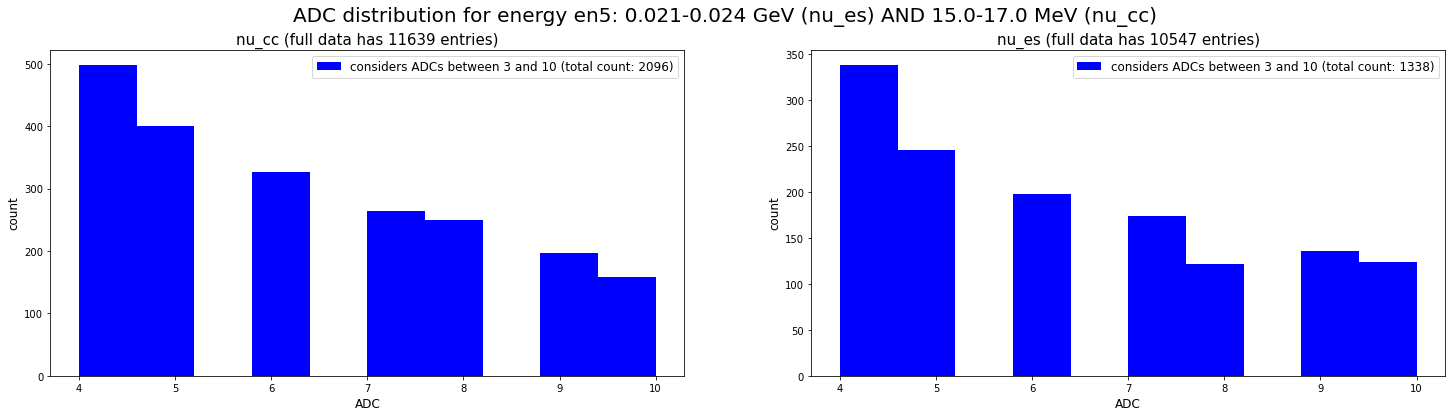

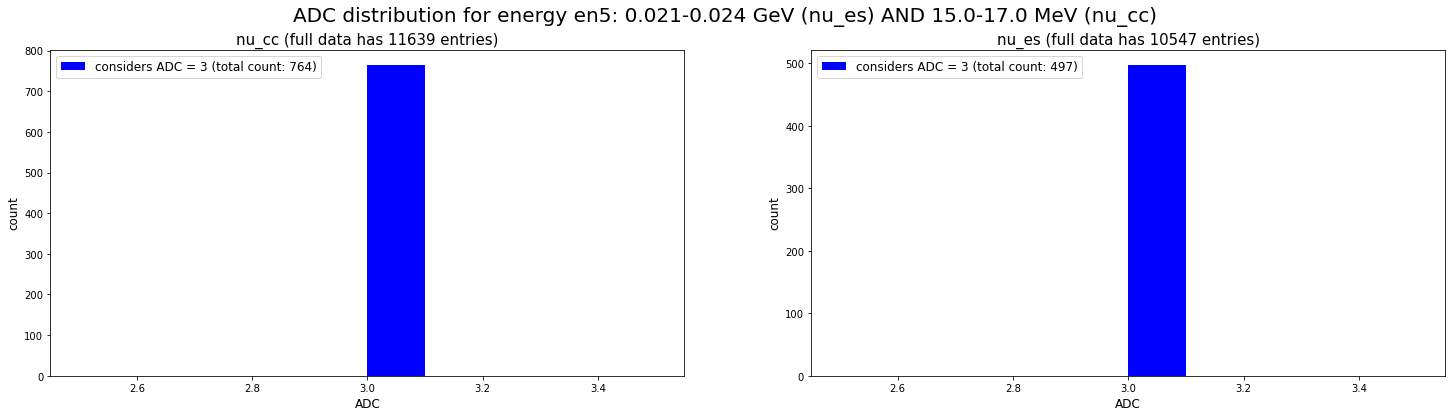

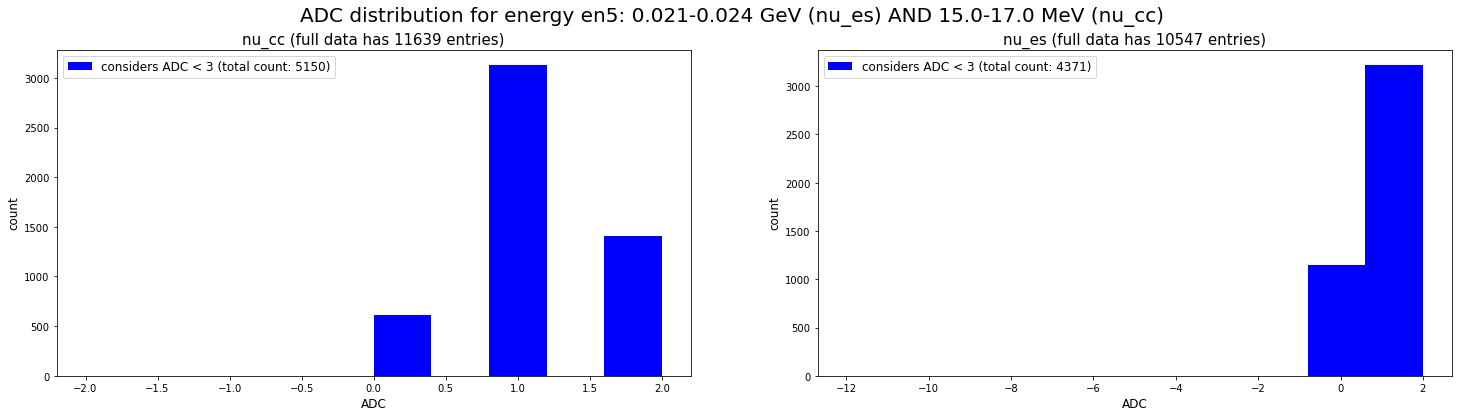

In [25]:
for i in range(0, 4):
    make_hist_adc(path_cc, path_es, "en5",i)

# en6: 0.024-0.027 GeV

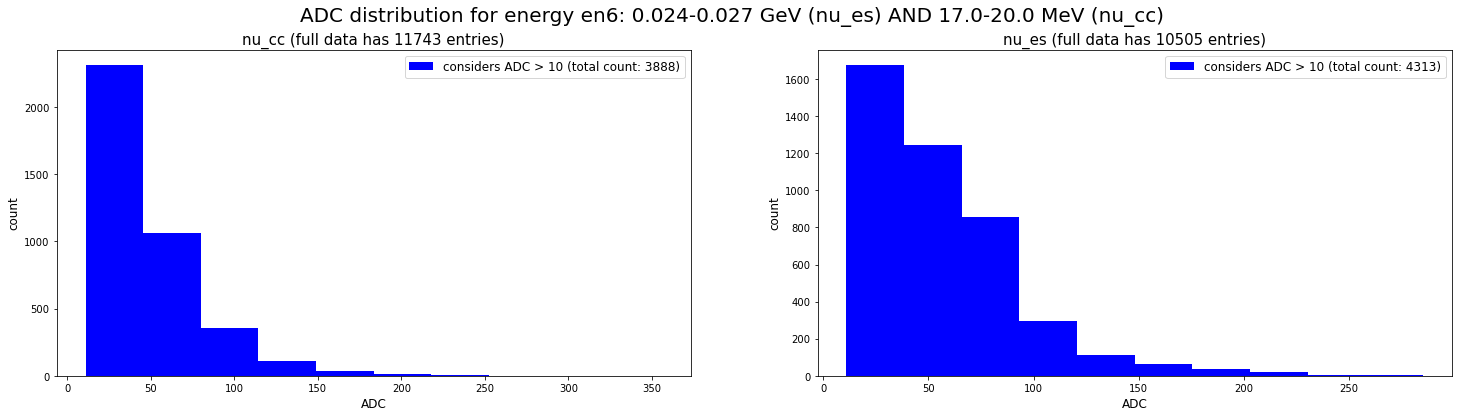

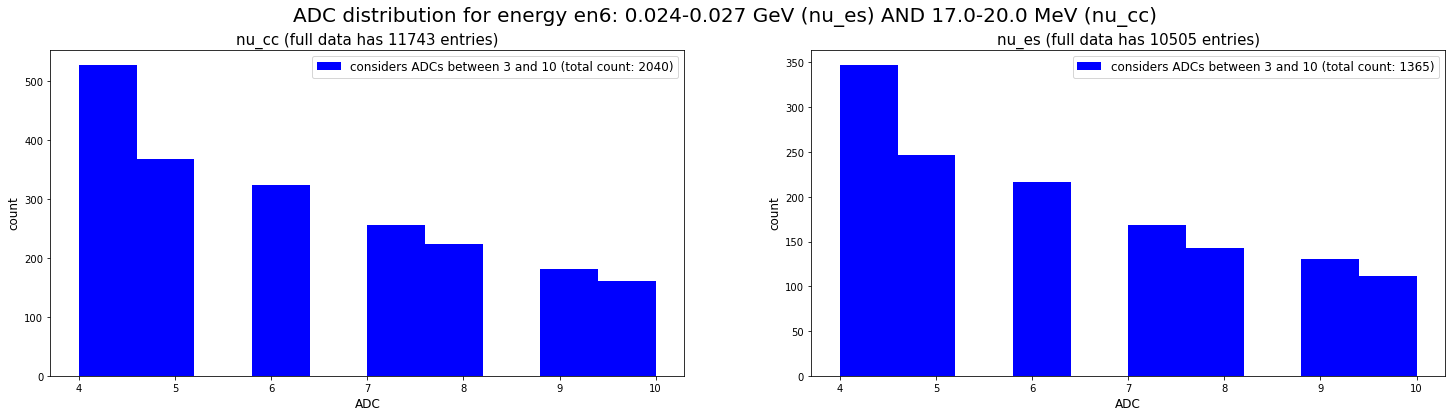

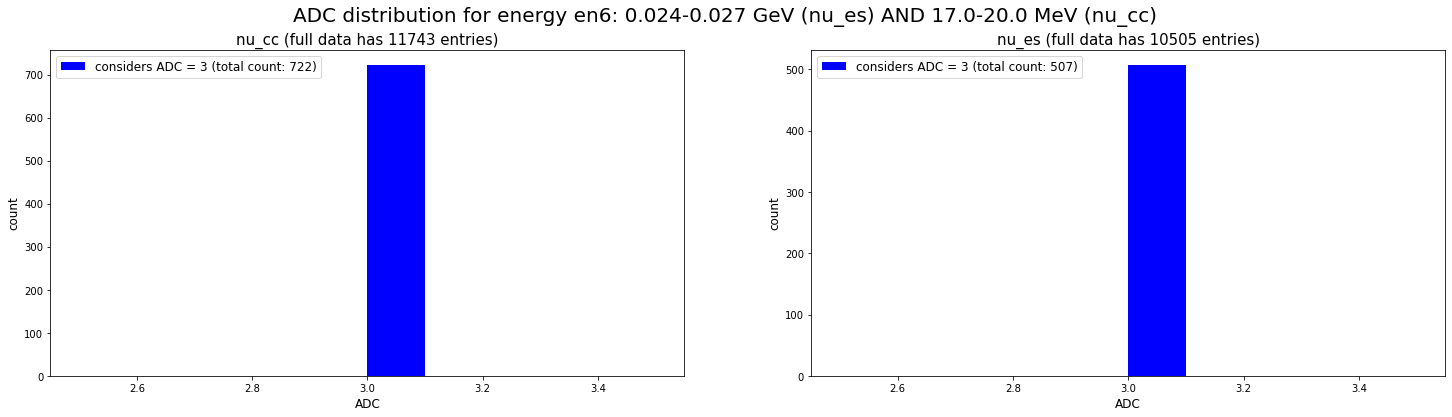

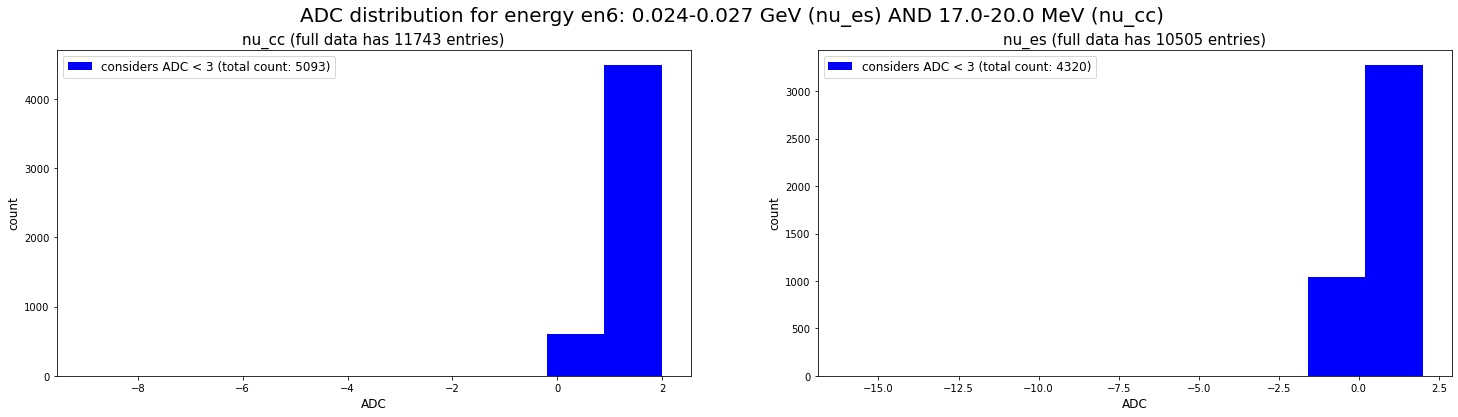

In [26]:
for i in range(0, 4):
    make_hist_adc(path_cc, path_es, "en6",i)

# en7: 0.027-0.031 GeV

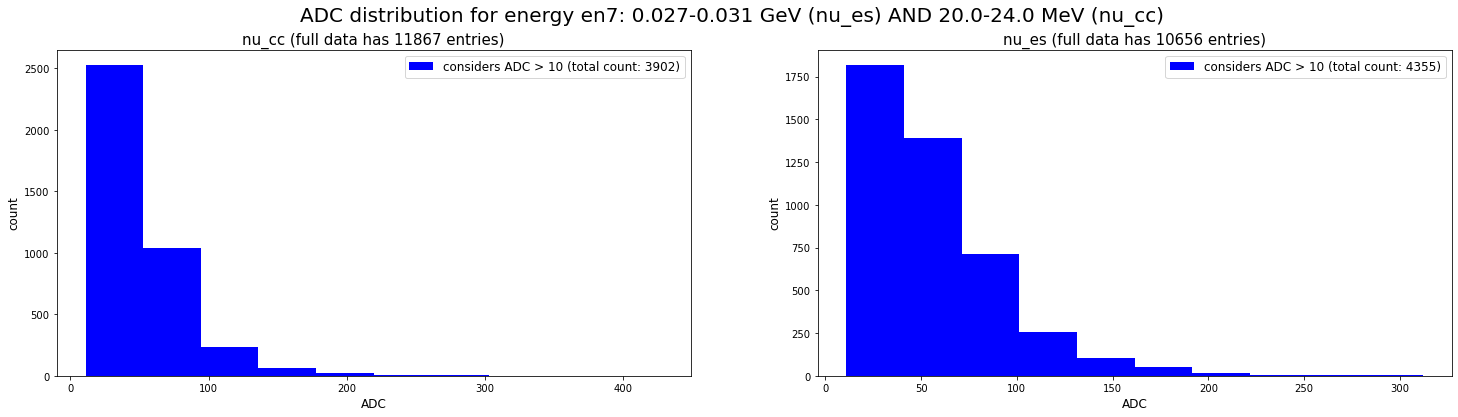

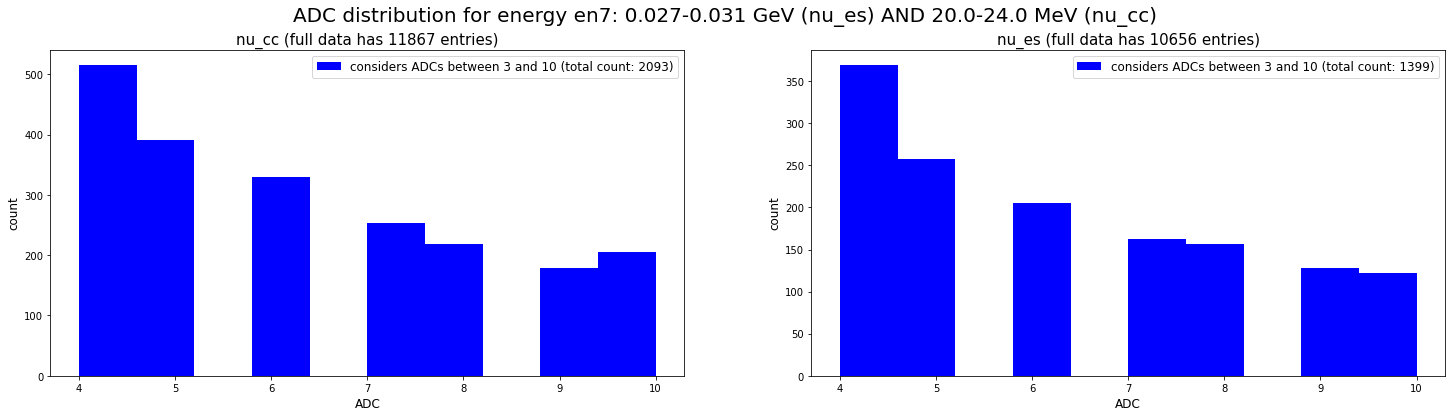

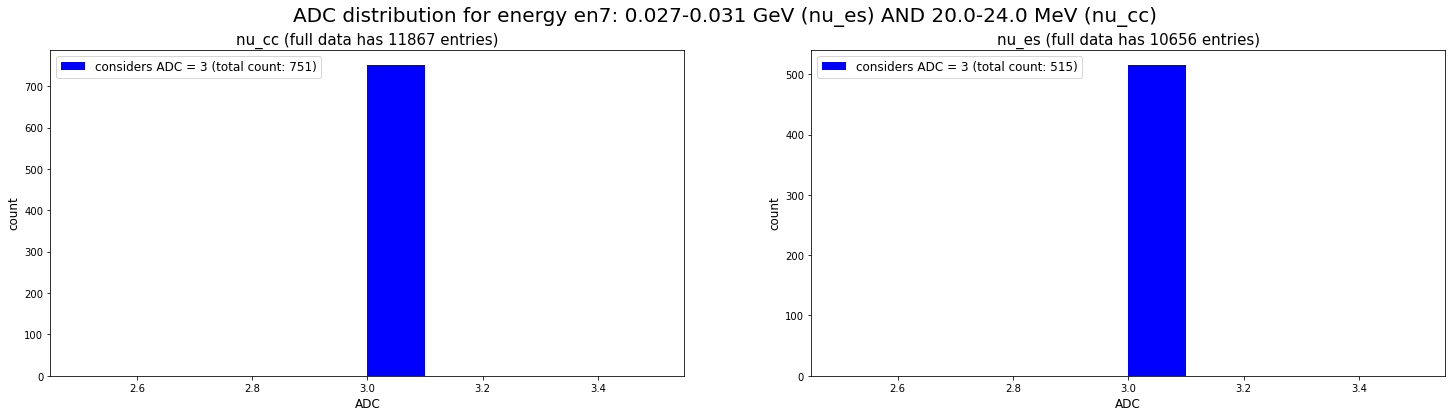

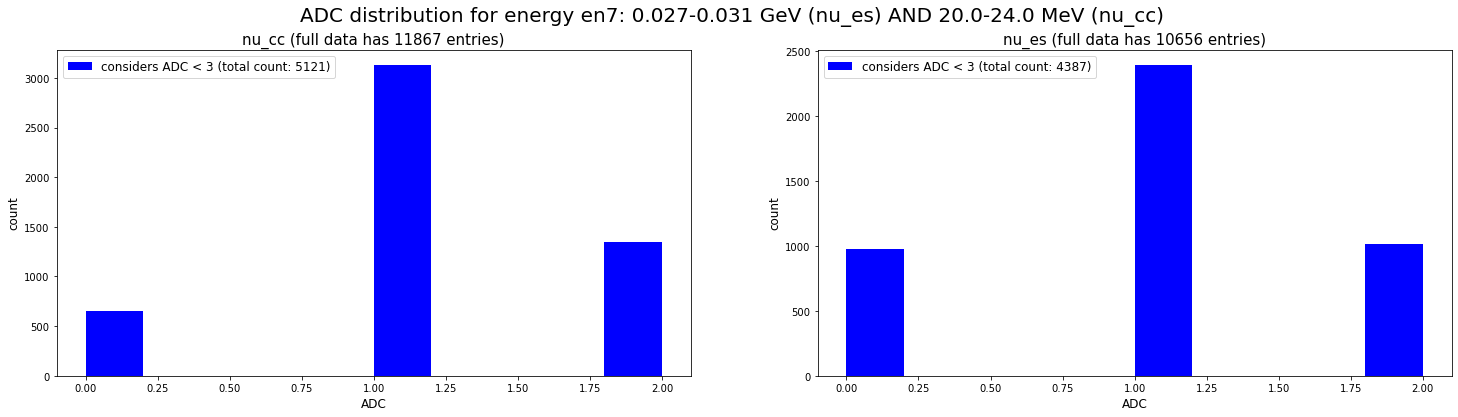

In [27]:
for i in range(0, 4):
    make_hist_adc(path_cc, path_es, "en7",i)

# en8: 0.031-0.036 GeV

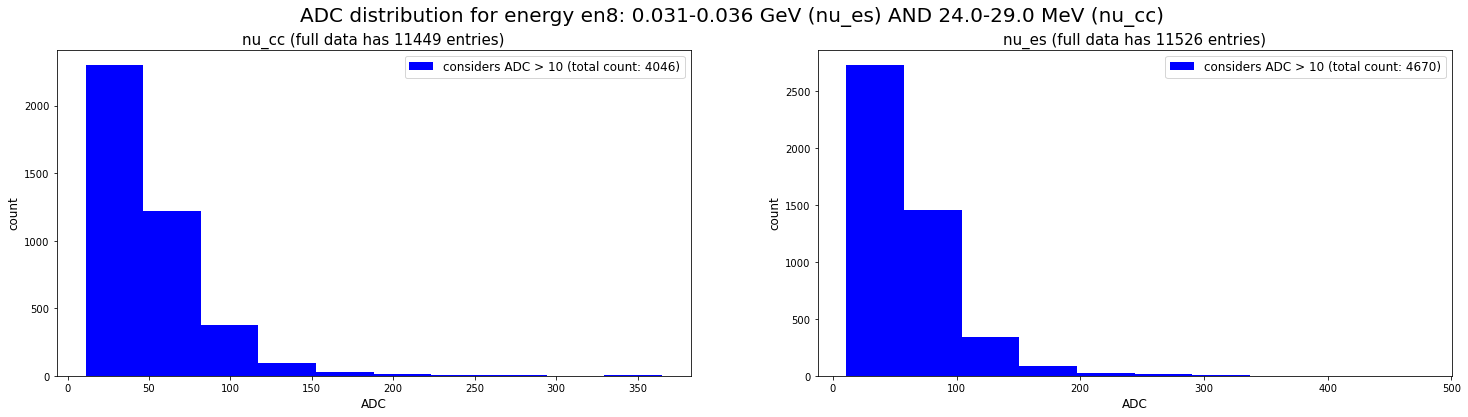

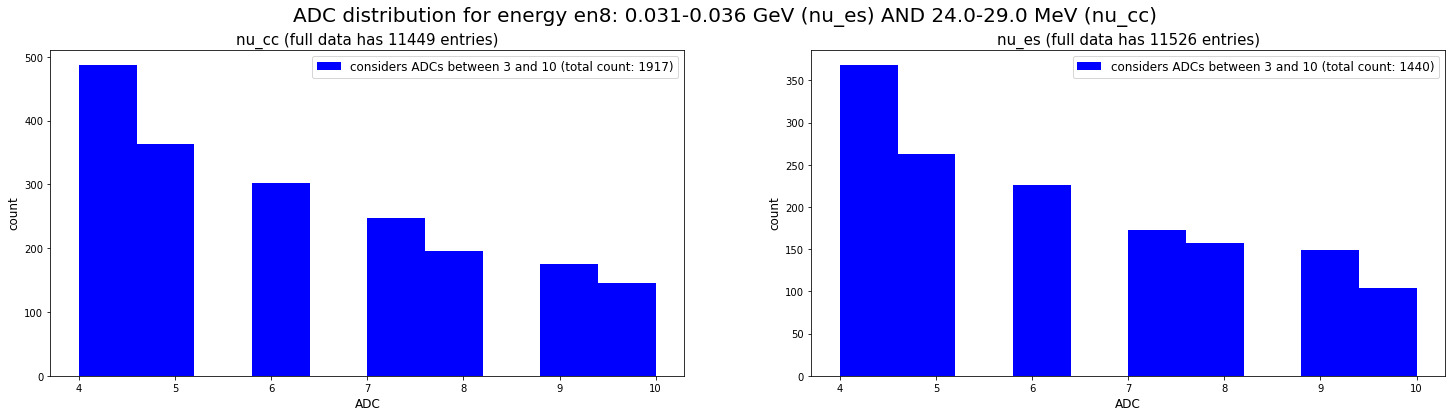

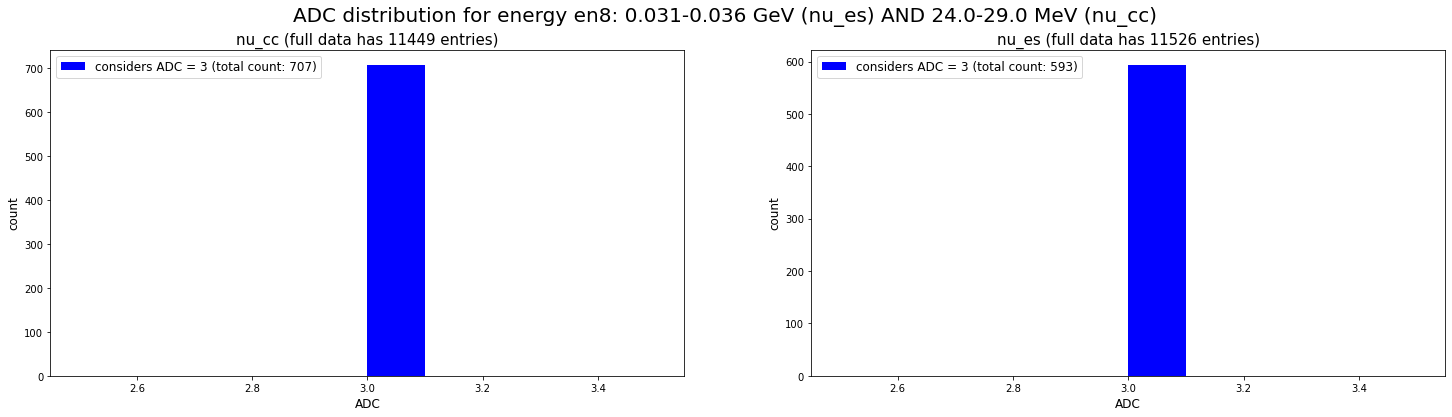

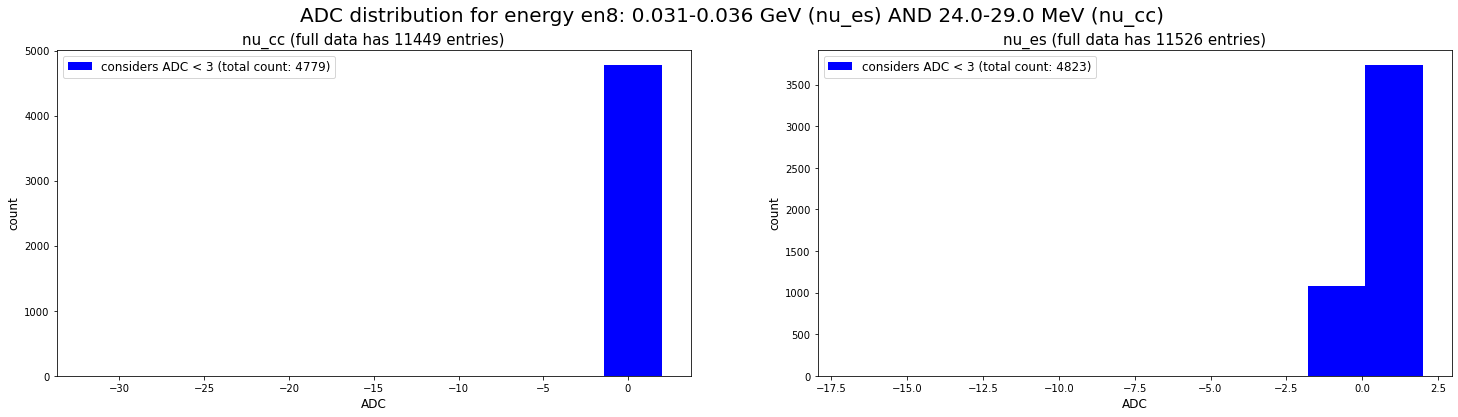

In [28]:
for i in range(0, 4):
    make_hist_adc(path_cc, path_es, "en8",i)

# en9: 0.036-0.079 GeV

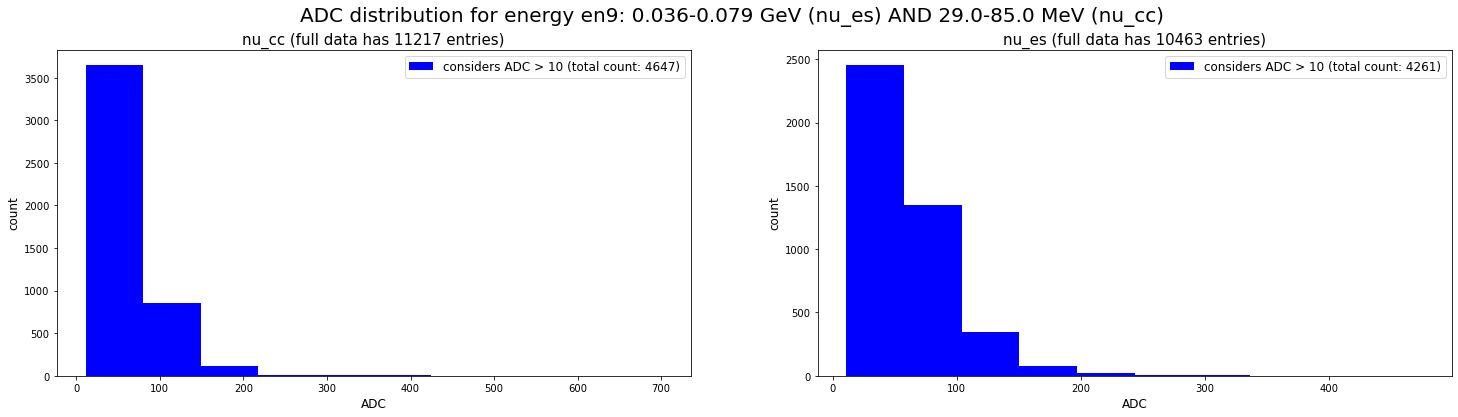

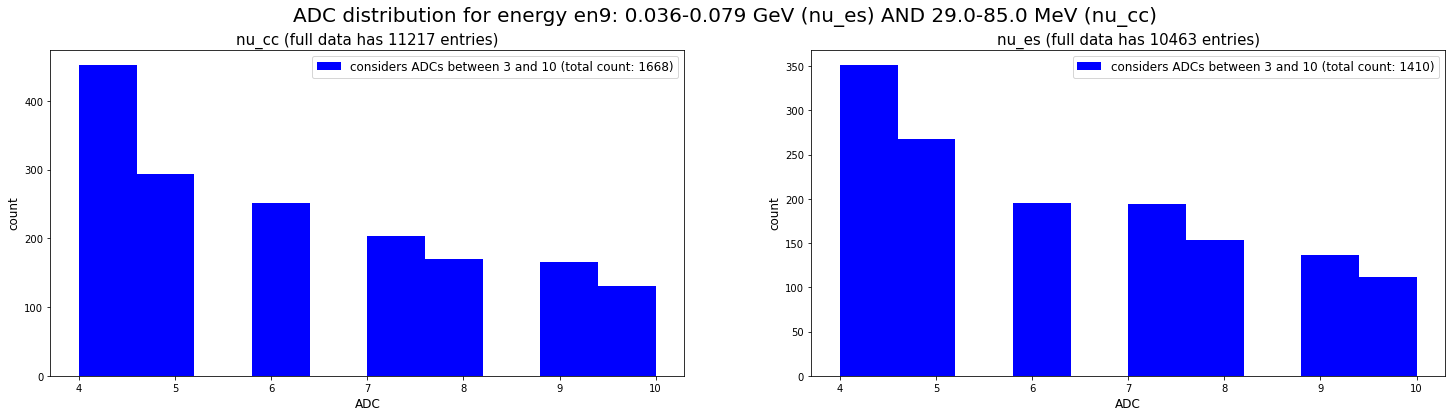

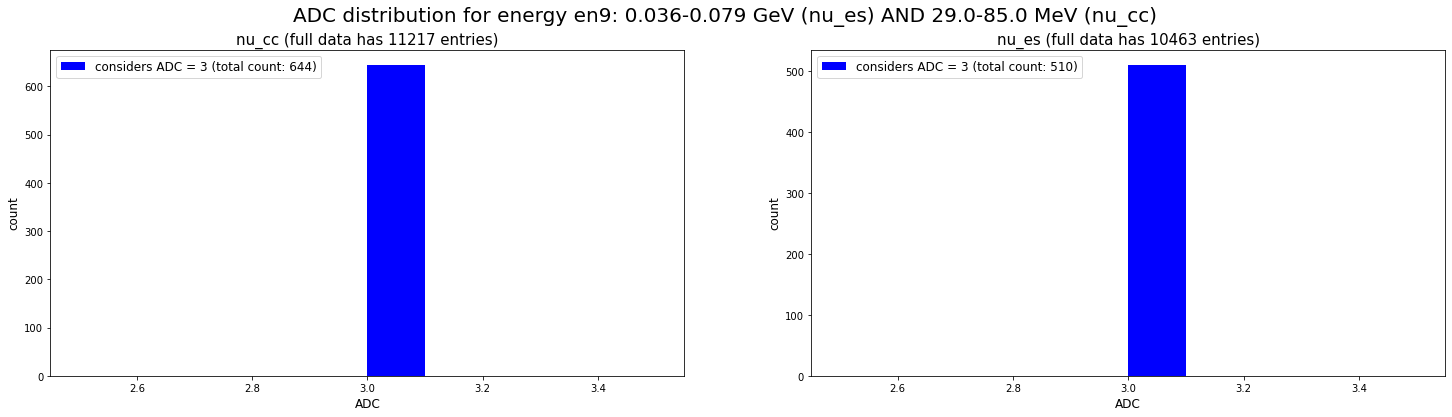

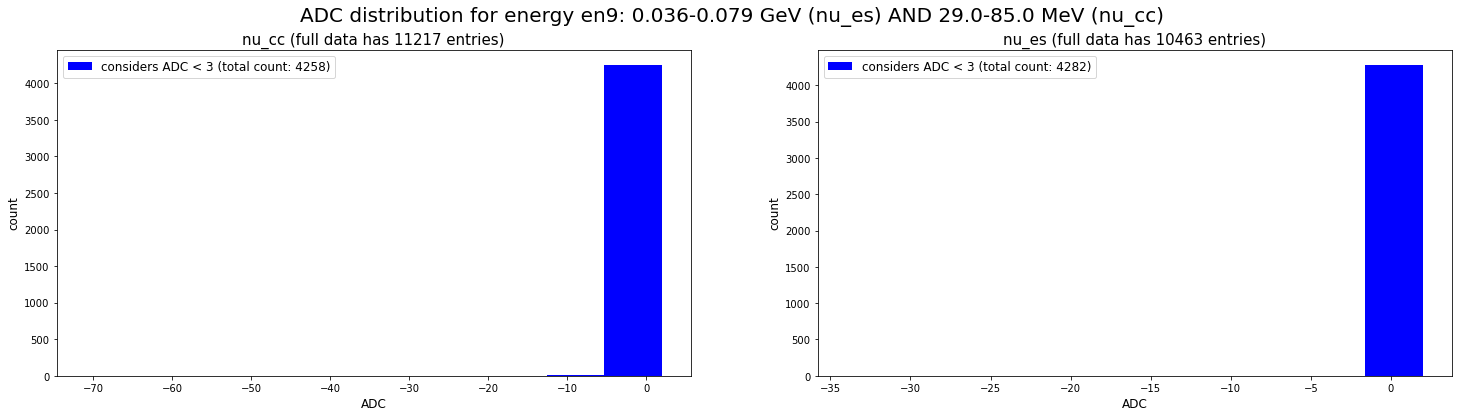

In [29]:
for i in range(0, 4):
    make_hist_adc(path_cc, path_es, "en9",i)